<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Supervised_Learning_2_Elvis_Njoroge_IP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED LEARNING 2**

# 1.  Introduction

# 1.a **Defining the Question**

As of 2020, it was estimated that the global real estate market was approximately 32.6 trillion. In 2021, the housing market saw an increase of 8.6% up from the previous 2020 year. The real estate market prices are affected by some variables that may include: government policies, interest rates and the health of an economy. Hass Consultancy limited has been in the market for over 25 years sort out a data scientist help to try and figure out how some variables affect the prices of homes they sell. 

# 1.b **Defining the metrics of success**

it is my hope to successfully come up with a regression model that will help predict the prices of the houses using the variables provided.

# 1.c **Understanding the context**

The real estate market was the main cause of the 2007 International Financial crisis that originated from the US. It is therefore important that research on various factors affecting the pricing of properties be conducted to help investors identify current market gaps in the market.

# **1.d Recording the experimental design**

The data will be subjected to cleaning, then ran through an intensive EDA process to define the relationships between various variables, and then subjected through the following regression techniques:Multilinear regression techniques, Quantile, Lasso, Ridge and Elastic Net Regression.

# 1.e Data relevance

The data being was collected from the Hass Consultancy Limited database[link text](http://bit.ly/IndependentProjectWeek7Dataset). *italicized text*

# 2. **Loading the dataset**

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [3]:
#loading the dataset
hass = pd.read_csv('Independent Project Week 7 - house_data.csv')
hass. head(4)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [ ]:
#Viewing the tail of the dataset
hass.tail(4)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#viewing the shape of the dataset
hass.shape

(21613, 20)

The housing dataset has 21613 entries and 20 variables that will be used for the study.

In [ ]:
#Finding out the data types of the dataset
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#viewing the names of the variables in the dataset
hass.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Checking whether the dataset has missing values
# Identify any missing values in the housing dataset
hass.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Their are no missing values in the dataset

In [ ]:
# Check for duplicate values in the hass  dataset
hass.duplicated().sum()

3

The dataset has 3 duplicates

In [ ]:
#checking for unique values in the dataset
hass.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
#Checking whether the dataset has the right data type
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Calculating the current statistics from the loaded dataset
hass.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2. b **Data Cleaning**

In [4]:
#dealing with the dublicates
hass.drop_duplicates(subset=None, keep='first', inplace= False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The duplicates have been removed as seen by the current shift of entries from 21613 to 21610.

In [5]:
#Drop columns that we will not use in our analysis
hasse= hass
hasse.drop(['id','lat','long','sqft_living15','sqft_lot15'],axis=1, inplace=True)
# Confirm changes
hasse.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125


In [6]:
#Checking for unique values in various columns 
hasse['price'].unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [7]:
#Checking for unique values in various columns
hasse['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [8]:
#Checking for unique values in various columns
hasse['sqft_living'].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [9]:
#Checking for unique values in various columns
hasse['sqft_lot'].unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076])

In [10]:
#Checking for unique values in various columns
hasse['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [11]:
#Checking for unique values in various columns
hasse['condition'].unique()

array([3, 5, 4, 1, 2])

In [12]:
#Checking for unique values in various columns
hasse['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [13]:
#Checking for unique values in various columns
hasse['view'].unique()

array([0, 3, 4, 2, 1])

In [14]:
#Checking for unique values in various columns
hasse['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [15]:
#Checking for unique values in various columns
hasse['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

We align our columns after dropping off some columns and dduplicate rows

In [16]:
# To align the columns in our dataset to fill in empty spaces 

hasse.columns = hass.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hasse.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028


In [17]:
hasse.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [18]:
#checking for any anomalies of the house dataset
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']
for i in col:

  u = hasse[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  price is [221900. 538000. 180000. ... 541800. 610685. 402101.]
Unique values of  bedrooms is [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
Unique values of  bathrooms is [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
Unique values of  sqft_living is [1180 2570  770 ... 3087 3118 1425]
Unique values of  sqft_lot is [ 5650  7242 10000 ...  5813  2388  1076]
Unique values of  floors is [1.  2.  1.5 3.  2.5 3.5]
Unique values of  waterfront is [0 1]
Unique values of  view is [0 3 4 2 1]
Unique values of  condition is [3 5 4 1 2]
Unique values of  grade is [ 7  6  8 11  9  5 10 12  4  3 13  1]
Unique values of  sqft_above is [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 242

The data has no anomalies and therefore we may proceed to look for the outliers

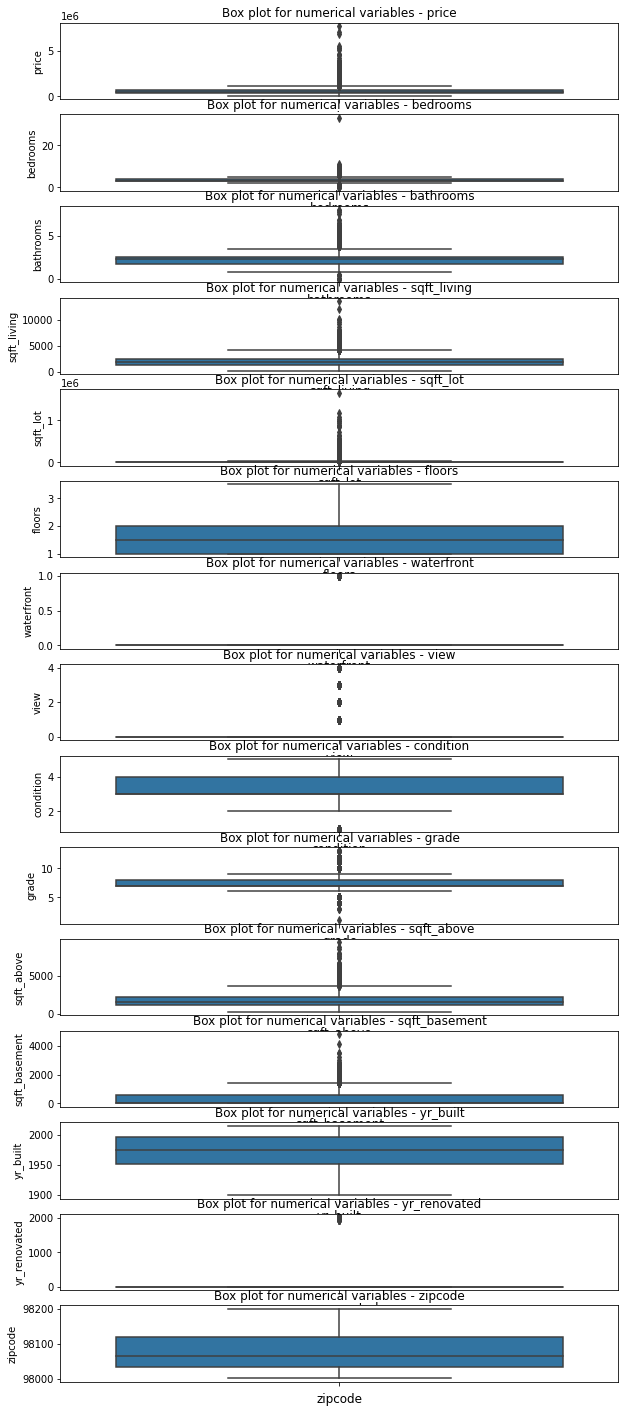

In [19]:
#checking for outliers
col_names= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']

fig, ax = plt.subplots(len(col_names), figsize=(10,25))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=hasse[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [20]:
##We will go ahead to remove the outliers in our dataset as its clear some of them could have been caused by entry errors
cols = ['sqft_lot', 'sqft_above'] # one or more

Q1 = hasse[cols].quantile(0.25)
Q3 = hasse[cols].quantile(0.75)
IQR = Q3 - Q1

hassi = hasse[~((hasse[cols] < (Q1 - 1.5 * IQR)) |(hasse[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(hassi)

          price  bedrooms  bathrooms  ...  yr_built  yr_renovated  zipcode
0      221900.0         3       1.00  ...      1955             0    98178
1      538000.0         3       2.25  ...      1951          1991    98125
2      180000.0         2       1.00  ...      1933             0    98028
3      604000.0         4       3.00  ...      1965             0    98136
4      510000.0         3       2.00  ...      1987             0    98074
...         ...       ...        ...  ...       ...           ...      ...
21608  360000.0         3       2.50  ...      2009             0    98103
21609  400000.0         4       2.50  ...      2014             0    98146
21610  402101.0         2       0.75  ...      2009             0    98144
21611  400000.0         3       2.50  ...      2004             0    98027
21612  325000.0         2       0.75  ...      2008             0    98144

[18865 rows x 15 columns]


We proceed to subject the data to Exploratory Data Analysis after removing outliers from the view and sqft above dataset.

# 3. **EXPLORATORY DATA ANALYSIS**

# **3.a Univariate Data Analysis**

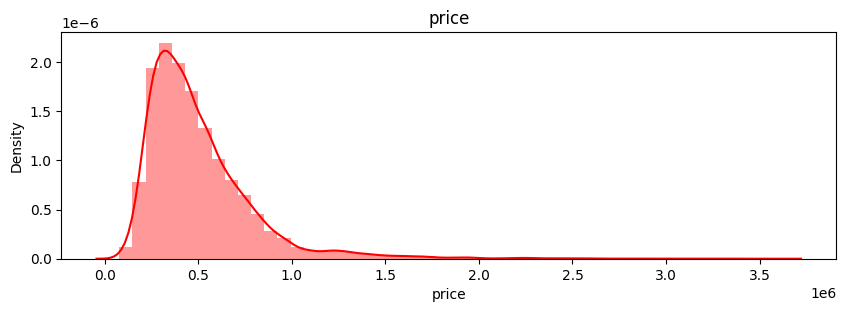

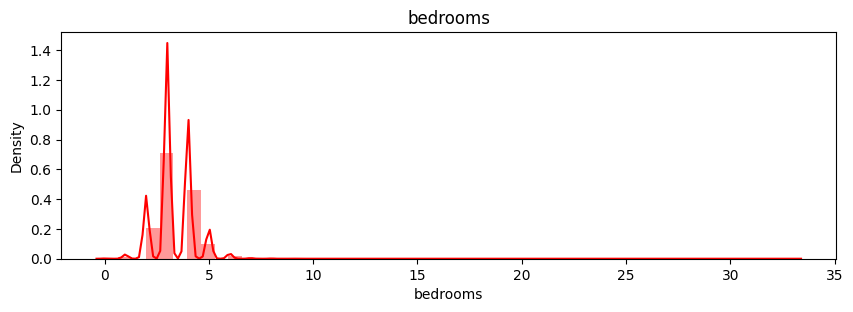

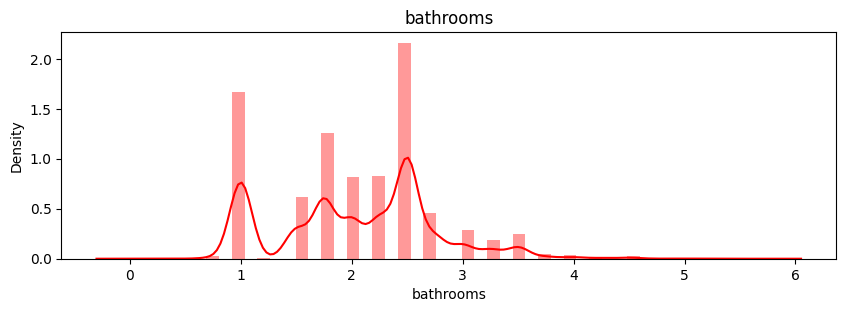

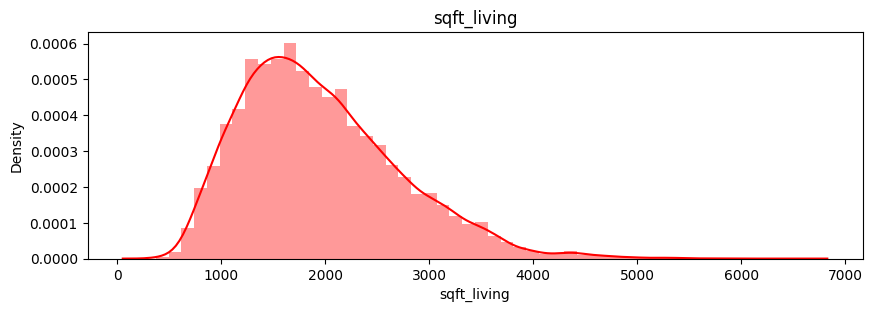

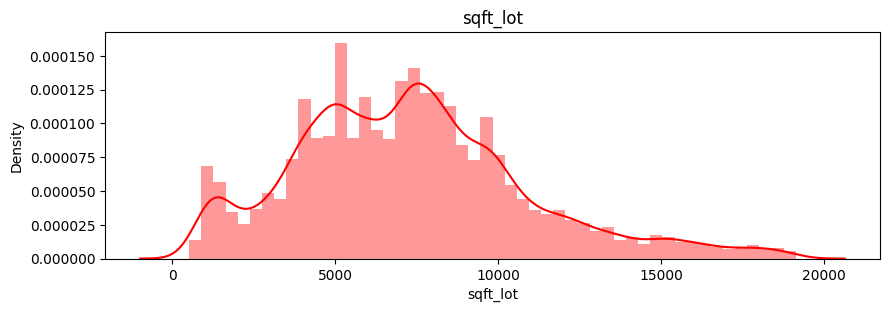

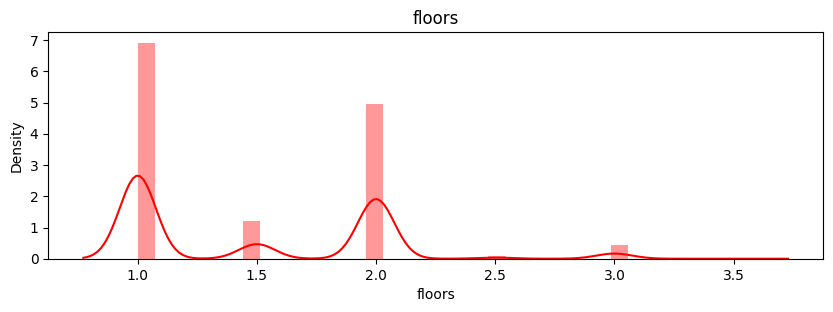

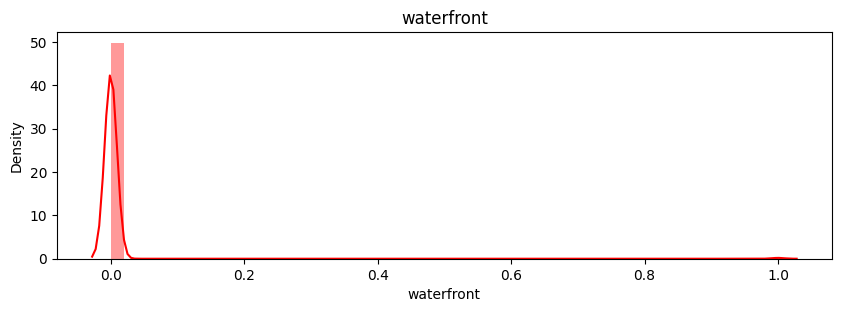

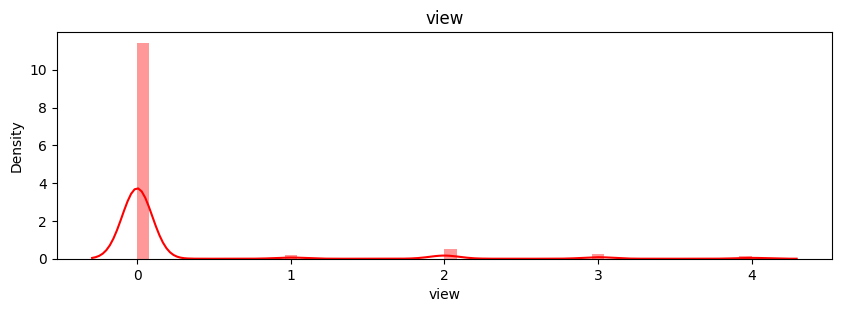

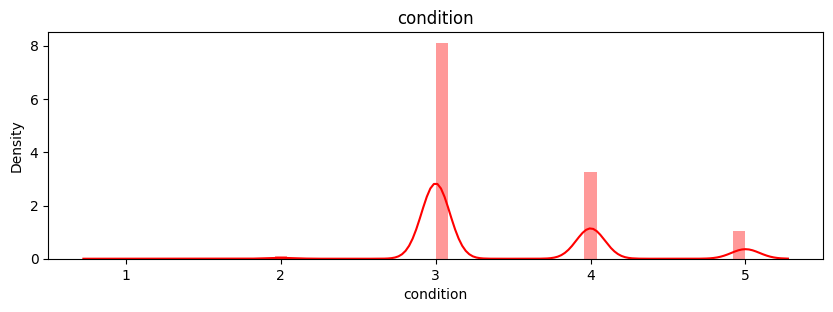

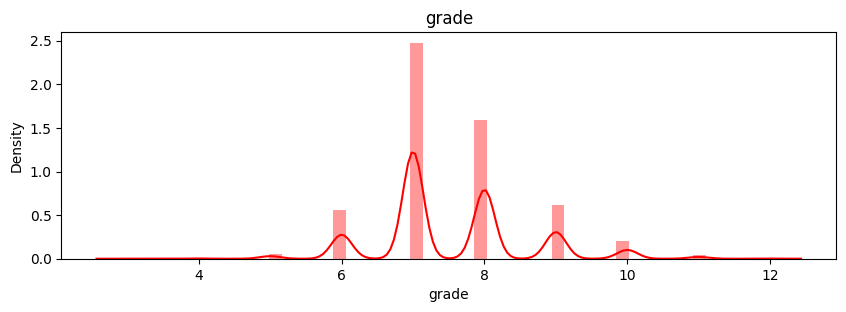

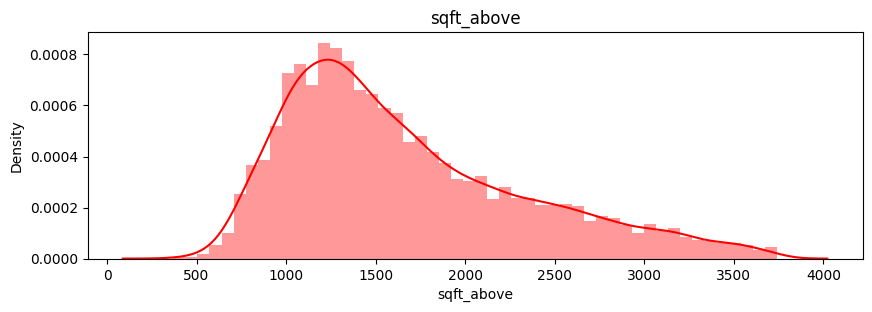

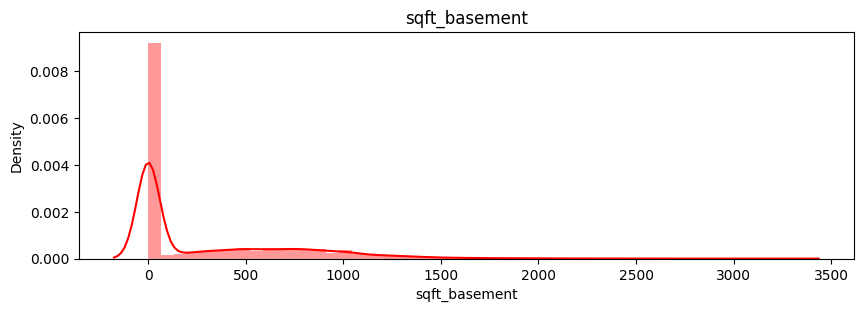

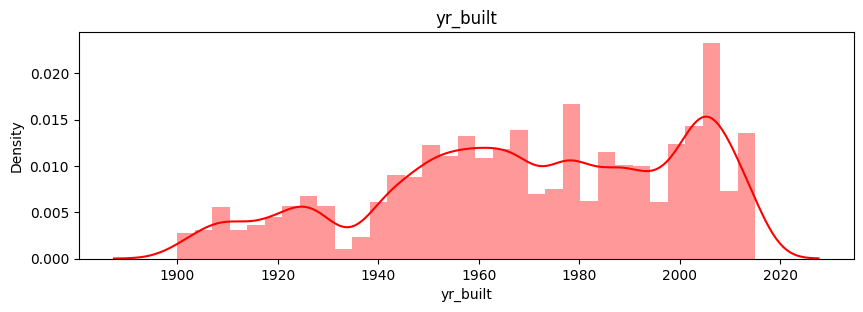

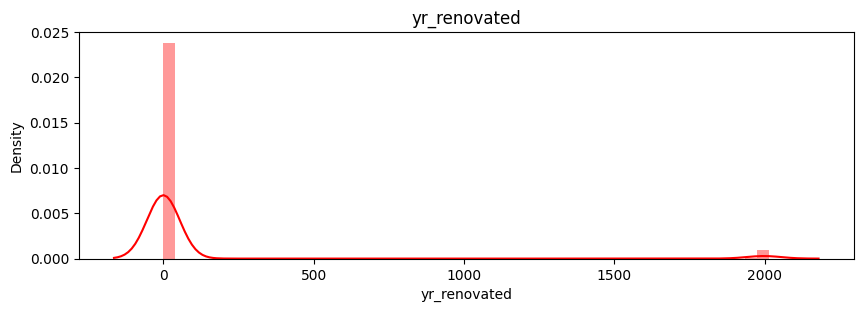

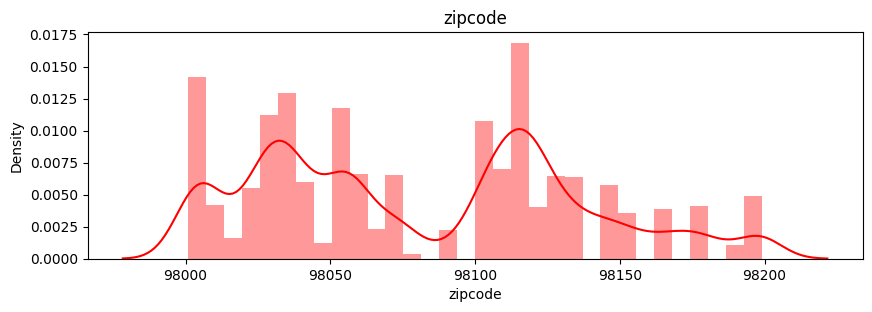

In [21]:
#Histogram of the numerical values
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']

for i in cols:
  plt.figure(figsize = (10,3), dpi=100)
  sns.distplot(hassi[i], kde = True, color = 'red')
  plt.title(i, color = 'Black')
  plt.show()

The variables under study are all in their numeriical form, the histogram plotted concludes that:

a) The positively skewed variables(columns) are: price, sqrt living, sqrt lot, sqrt above and sqrt basement.

b) The year built data is skewed to the left.

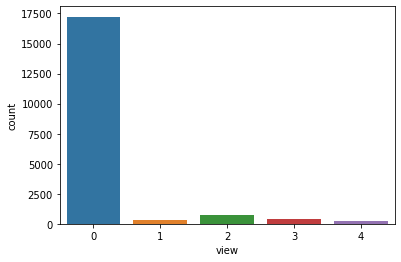

In [ ]:
# Plotting the count of houses with a view

sns.countplot(hassi['view'])


Most of the Houses sold by Hass Consulting company did not have any view

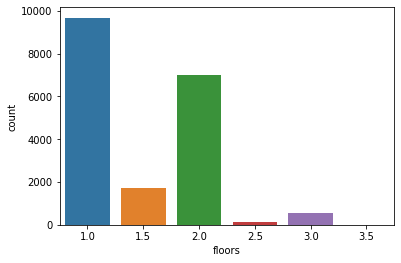

In [ ]:
# Plotting the count of houses based on their floors

sns.countplot(hassi['floors'])


Most of the houses sold had 1 floor followed by two floor houses

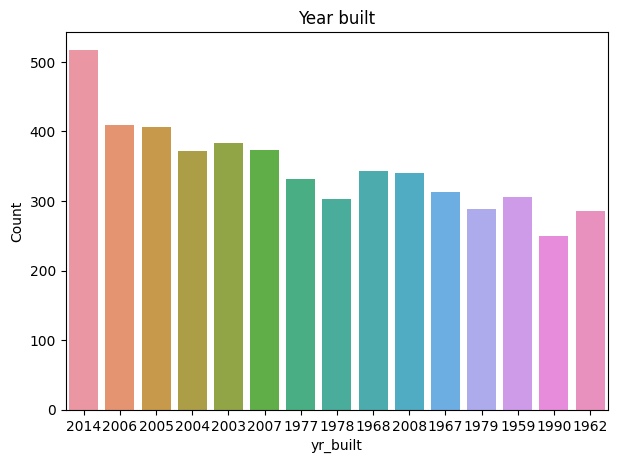

In [22]:
#Countplot showing the number of houses Hass Consultancy sold using the year they were built
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(hassi['yr_built'], order=hass['yr_built'].value_counts().index[:15])
plt.title('Year built')
plt.ylabel("Count")
plt.show()

Most of the houses sold were built in 2014

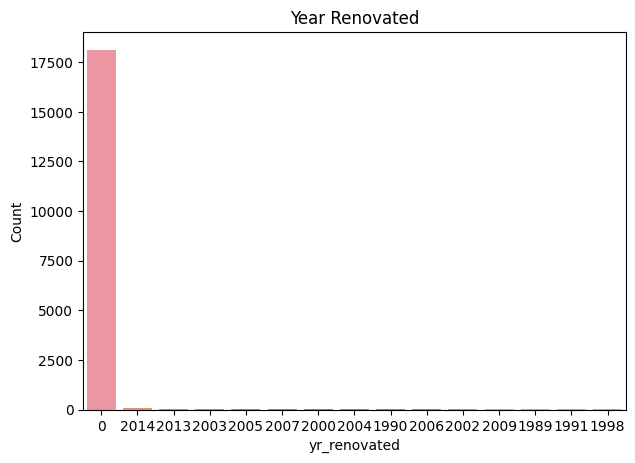

In [23]:
#Countplot showing the number of houses sold when they were renovated
plt.figure(figsize = (7,5), dpi=100)
sns.countplot(hassi['yr_renovated'], order=hass['yr_renovated'].value_counts().index[:15])
plt.title('Year Renovated')
plt.ylabel("Count")
plt.show()

Most of the houses sold were recently renovated (after 2014)

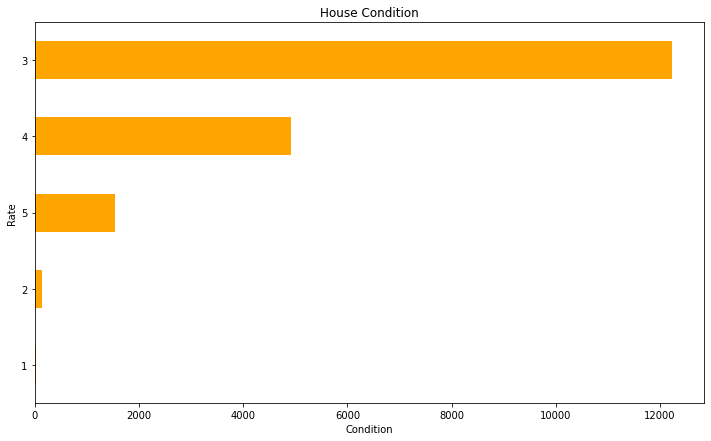

In [24]:
# Bar chart showing the houses sold by the their ratings
plt.figure(figsize = (12,7))
hassi.groupby('condition').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('House Condition')
plt.ylabel('Rate')
plt.xlabel('Condition')
plt.show()

The consultancy sold more houses rated 3 and above

In [25]:
# Frequency Table of the house prices
hassi.price.value_counts()

350000.0    157
450000.0    149
325000.0    140
425000.0    137
550000.0    136
           ... 
447450.0      1
790500.0      1
177500.0      1
561750.0      1
402101.0      1
Name: price, Length: 3377, dtype: int64

The consultancy sold more houses in the $350000 price range

In [26]:
# Finding the mean of numerical columns
hassi['price'].mean()

502306.912006361

The averege price of the house sold was $502306

In [27]:
# The Kurtosis of numerical columns
hassi['zipcode'].kurt()

-0.961423250037194

The data has a negative kurtosis meaning that the data has a lighter tail(no extreme values)

Recommendations

a) The consultancyfirm can create financial aid for houses around $ 350,000

b) The firm can concentrate on selling houses that have 2 floors.

C) The firm should consider renovating houses that were constructed decades ago. 


# 3.b Bivariate Analysis

<Figure size 700x500 with 0 Axes>

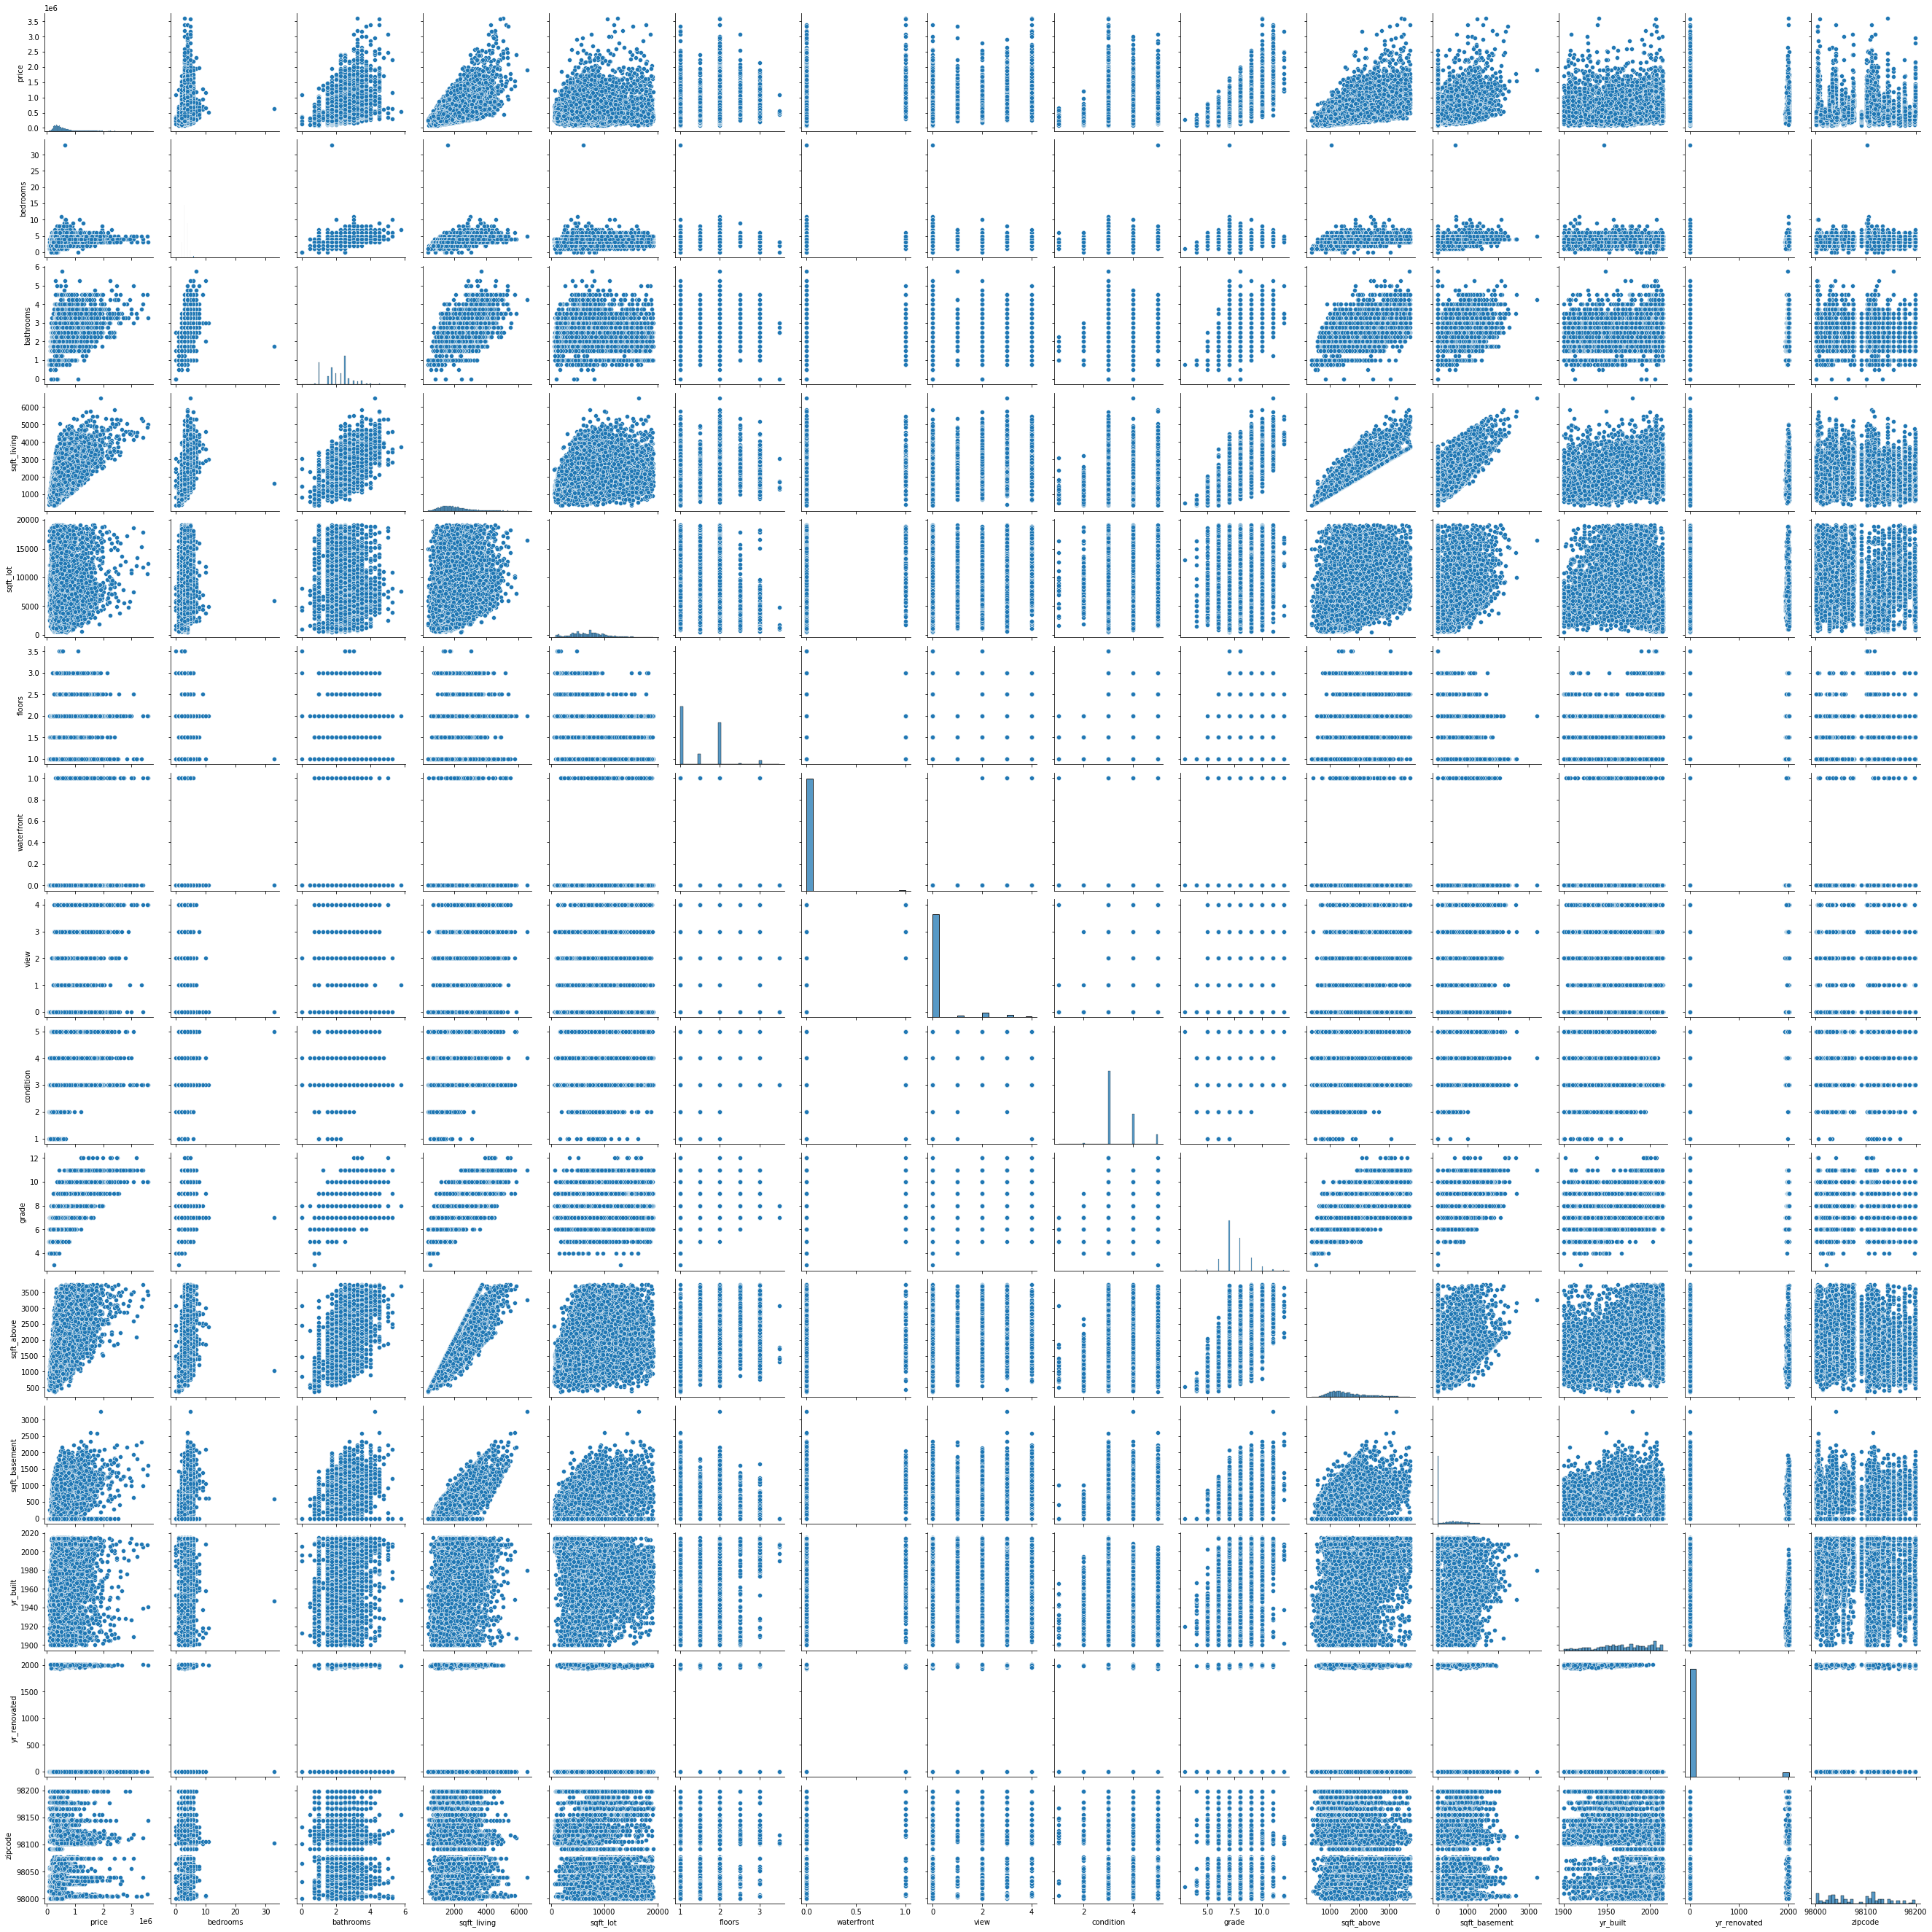

In [28]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']
sns.pairplot(hassi[y])

Their is no relationship between some columns

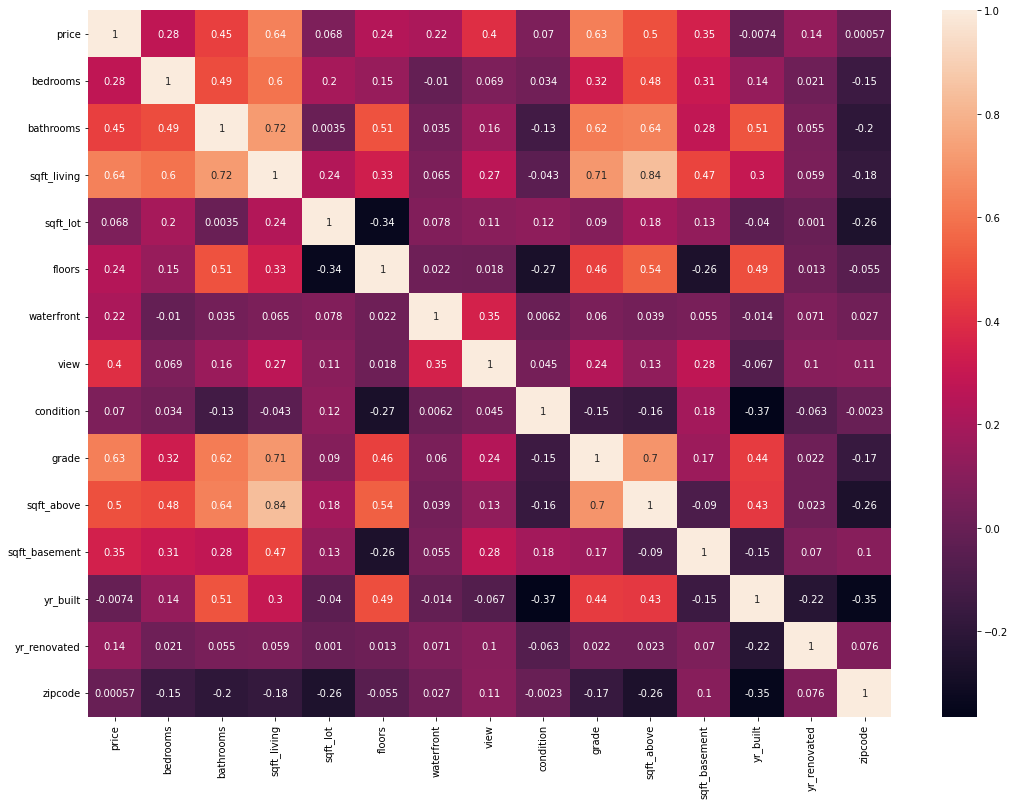

In [ ]:
#A correlation matrix of the numerical values
corr = hassi.corr()
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr, annot=True)

The highest weakly correlated relationships between variables are year bult and condition built(-0.36), zipcode and year built(-.035), condition nd floors (-0.26) and year built and condition(-0.36). The year built of the house generally affects its condition. The strongly corelated relationships are: sqft living and sqft above(0.88), grade and sqft living (0.76), bathrooms and sqft above (0.69). The more the square feet for living space the higher the chances of a house being bought.

**Recommendations**

a) The consultancy firm should consider renovating all houses that were built a long time ago to a grade 3 level should they stand to make a sale.

b) The square feet either living or above provides a competitive advantage for most houses. The strategy should be explored.

# 3.c **Multivariate Analysis**

The type of regression techniques suggest that a Supervised learning and hence we employ the Linear Discriminant Analysis Technique

In [ ]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#These are the columns that we will use for the analysis
coll = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']

In [ ]:
hassi.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028


In [ ]:
hassi.shape

(18865, 15)

In [ ]:
#Step 1: Seperating our target label (diagnosis) from other features
X = hassi.drop(['price'], axis = 1)
Y = hassi['price']

In [ ]:
#Step 2: Confirming the features don't contain the target variable
X[0:14]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038
10,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007


In [ ]:
#Checking the unique values of the target variable
Y.unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [ ]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 1.07658366e+02,  2.00275997e+02,  9.32524049e-02, ...,
         2.20379058e+01, -1.93653021e-02,  4.98980572e+01],
       [ 1.06050769e+02,  2.00181248e+02,  9.45064111e-02, ...,
         2.19783932e+01, -1.94813799e-02,  4.97998019e+01],
       [ 1.07912875e+02,  2.00032992e+02,  9.37068907e-02, ...,
         2.20390135e+01, -1.93497208e-02,  4.98906621e+01],
       ...,
       [ 1.05034937e+02,  2.04648448e+02,  1.02208419e-01, ...,
         2.19185819e+01, -1.03114381e-02,  4.98753626e+01],
       [ 1.08080434e+02,  2.04243954e+02,  1.01668689e-01, ...,
         2.19699185e+01, -1.84485912e-02,  4.98399859e+01],
       [ 1.04303500e+02,  1.99923922e+02,  1.05324558e-01, ...,
         2.19170343e+01, -2.31810258e-03,  4.98903827e+01]])

In [ ]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
condition,253.510722
bathrooms,200.275997
bedrooms,107.658366
grade,76.049985
zipcode,49.898057
yr_built,22.037906
sqft_above,0.380441
sqft_lot,0.115218
sqft_living,0.093252
yr_renovated,-0.019365


*Observations*
The factors that affect the pricing of the houses are: the condition of the house, bedrooms, number of bathrooms, the grade allocated to the house, zipcode(location of the house) and the year built. Square feet above

# 4. Model Building

# 4.1 **Multiplelinear Regression**

Conducting linear regresion, 

a)we define the X and Y variables
X= all other iindependent variables affecting the model
Y= dependent variable, in this case (Price) the model is trying t predit.

b) we then train and test at least 20% of the dataset.

c0 Buidl the model

In [ ]:
#Dropping columns that we will not need for the study
hassi = hassi.drop(columns=['sqft_lot','waterfront','yr_renovated','sqft_basement'])
hassi.head(3)

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,zipcode
0,221900.0,3,1.00,1180,1.0,0,3,7,1180,1955,98178
1,538000.0,3,2.25,2570,2.0,0,3,7,2170,1951,98125
2,180000.0,2,1.00,770,1.0,0,3,6,770,1933,98028


In [ ]:
hassi.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode'],
      dtype='object')

In [ ]:
#We check for multicoliinerlity for the model
corr = hassi.corr()
corr

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,zipcode
price,1.000000,0.296803,0.446162,0.615768,0.264471,NaN,0.048803,0.622559,0.520421,0.037456,-0.045257
bedrooms,0.296803,1.000000,0.486008,0.593817,0.157417,NaN,0.038976,0.321686,0.472588,0.143695,-0.157081
bathrooms,0.446162,0.486008,1.000000,0.712744,0.508667,NaN,-0.132109,0.615512,0.631492,0.541113,-0.219939
sqft_living,0.615768,0.593817,0.712744,1.000000,0.346237,NaN,-0.058203,0.700287,0.847768,0.338002,-0.228587
floors,0.264471,0.157417,0.508667,0.346237,1.000000,NaN,-0.271184,0.464380,0.533819,0.505486,-0.052157
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.048803,0.038976,-0.132109,-0.058203,-0.271184,NaN,1.000000,-0.153409,-0.165245,-0.355843,-0.009930
grade,0.622559,0.321686,0.615512,0.700287,0.464380,NaN,-0.153409,1.000000,0.705751,0.477168,-0.196593
sqft_above,0.520421,0.472588,0.631492,0.847768,0.533819,NaN,-0.165245,0.705751,1.000000,0.450394,-0.287952
yr_built,0.037456,0.143695,0.541113,0.338002,0.505486,NaN,-0.355843,0.477168,0.450394,1.000000,-0.336047


In [ ]:
#we Then proceed to get the Variance Inflation Factor of the dataset
#creating an inverse matrix
vif= pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

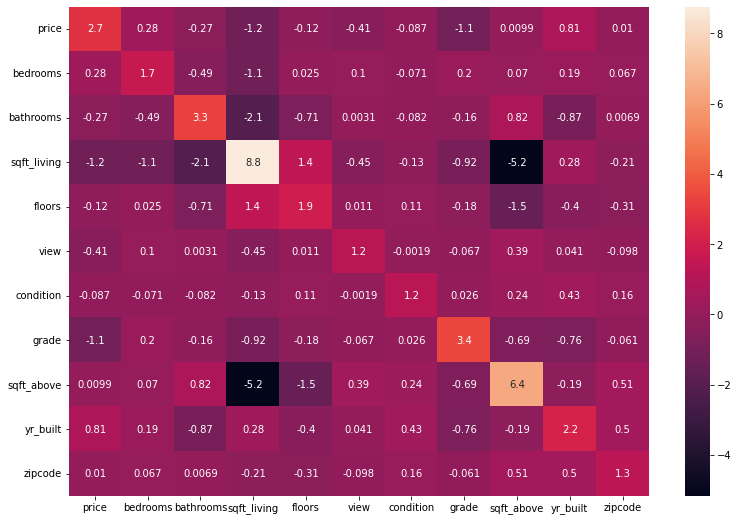

In [ ]:
#plotting a heat map of the VIF values
plt.figure(figsize =(13,9))
sns.heatmap(vif, annot = True)


Reading the VIF scores diagonally,the highest score is sqft_ living column

In [ ]:
#Removing the sqft _living column to see if the values will change
revised = hassi.drop(columns=['sqft_living'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,yr_built,zipcode
price,2.434856,0.079062,-0.495788,-0.033183,-0.470433,-0.138642,-1.292696,-0.394389,0.922762,-0.038974
bedrooms,0.079062,1.539655,-0.706522,0.284568,0.046511,-0.082594,0.107910,-0.668547,0.226950,0.021681
bathrooms,-0.495788,-0.706522,2.559601,-0.404196,-0.085523,-0.110978,-0.314221,-0.271160,-0.814511,-0.019577
floors,-0.033183,0.284568,-0.404196,1.796759,0.112400,0.139996,-0.006078,-0.700800,-0.456578,-0.293188
view,-0.470433,0.046511,-0.085523,0.112400,1.222936,0.005482,-0.084530,0.064595,0.030571,-0.118782
condition,-0.138642,-0.082594,-0.110978,0.139996,0.005482,1.220338,0.041287,0.133863,0.426311,0.165336
grade,-1.292696,0.107910,-0.314221,-0.006078,-0.084530,0.041287,3.023937,-0.968335,-0.787506,-0.060712
sqft_above,-0.394389,-0.668547,-0.271160,-0.700800,0.064595,0.133863,-0.968335,2.888681,-0.061548,0.378759
yr_built,0.922762,0.226950,-0.814511,-0.456578,0.030571,0.426311,-0.787506,-0.061548,2.323830,0.502616
zipcode,-0.038974,0.021681,-0.019577,-0.293188,-0.118782,0.165336,-0.060712,0.378759,0.502616,1.259512


As observed by the changes above, price and square feet of living space are collinear.


In [ ]:
#Getting our attributes and labels
X_price = np.array(hassi[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode']])
y_price = hassi['price']
print(X_price.shape)
print(y_price.shape)

(18865, 10)
(18865,)


In [ ]:
#Split the dataset into train and test sets.the data set will be split in an 80-20 ratio
X_price_train, X_price_test, y_price_train,y_price_test = train_test_split(X_price,y_price,test_size=0.2,random_state =100)

In [ ]:
#Viewing the shape of the train and test data
y_price_train.shape

(15092,)

In [ ]:
y_price_test.shape

(3773,)

In [ ]:
#The data is now ready for normalization and hence we use the scalar function

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_price_train = sc.fit_transform(X_price_train)
X_price_test = sc.transform(X_price_test)

The above function confirms that the training and test sets can now be subjected to the multiregression function

In [ ]:
#Fitting the linear regression model
reg_line_price = LinearRegression()
reg_line_price.fit(X_price, y_price)

LinearRegression()

In [ ]:
#importing a library
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn import linear_model


In [ ]:
#fitting in the multiregression model
multireg = (mean_squared_error(y_true=y_price,y_pred=reg_line_price.predict(X_price)))
print(multireg)

32744537816.488808


We proceed to train the dataset

In [ ]:
# Create a Linear regressor
regression_line_price = LinearRegression()
#
# Train the model using the training sets
#
regression_line_price.fit(X_price_train, y_price_train)

LinearRegression()

We then proceed to find the y-intercept from the trained dataset

In [ ]:
#  y intercept
regressor.intercept_

1.1641532182693481e-10

The value above represents the price of houses when all variiables are constant(0).

In [ ]:
X_price_test.shape

(3773, 10)

In [ ]:
#make predictions on the house  test data
y_pred = regressor.predict(X_price_test)
#
y_pred

array([ 0.71971998, -0.35711297, -0.35711297, ..., -0.35711297,
       -0.35711297, -0.35711297])

We now make a comparison between the predicted values and the actual values

In [ ]:
#Comparison
comparison = pd.DataFrame({'Actual': y_price_test, 'Predicted': y_pred})
comparison.head(10)

,Actual,Predicted
3575,525000.0,0.719720
2173,270000.0,-0.357113
7831,540000.0,-0.357113
16296,620000.0,-0.357113
12489,357950.0,-1.433946
20980,495000.0,-0.357113
5937,261000.0,-0.357113
4227,755000.0,-1.433946
756,942500.0,1.796553
18350,685000.0,-0.357113


The variation between the actual and predicted is large, and hence the model may be incorrect in forecasting future prices.

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_price_test,y_pred)

-2.8684684677654424

The value received can be challenged by removing some of the outliers.

**Testing for residuals and heteroskendasticity**

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = hassi['price'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our hass dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

5.091049059486945e-12

The resultant mean of the new model suggest that our model is fairly correct as the predicted value is too high.

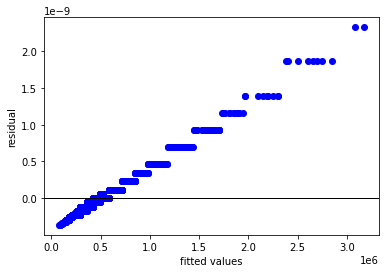

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=1)
plt.show()

The values are not centered around the mean suggesting that the data contains outliers. It also suggests that another model should be used to challenge the results.

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


This means that the average squared mean across the variables is the same.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_price_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_price_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_price_test, y_pred)))

Mean Absolute Error: 505037.31500062643
Mean Squared Error: 343981951198.93677
Root Mean Squared Error: 586499.7452675805


A mean squared error suggests a value greater than 10% mean of the predicted housing price suggesting that the model has not been accurate in its prediction

**Recommentaions **

a) The outliers in the dataset may be removed to help the model predict accurately

b) The scope of the study may consider more data from other variables not included

As stated earlier, the dependent variable being used to build the model is price.


# 4.2 **Quantile Regression**

We consider low(.25), medium(0.5) and high(0.75) prices from the dataset

In [ ]:
#Viewing the data to be used
hassi.head(4)

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,zipcode
0,221900.0,3,1.00,1180,1.0,0,3,7,1180,1955,98178
1,538000.0,3,2.25,2570,2.0,0,3,7,2170,1951,98125
2,180000.0,2,1.00,770,1.0,0,3,6,770,1933,98028
3,604000.0,4,3.00,1960,1.0,0,5,7,1050,1965,98136


We will use the features created in Multilinear regression

In [ ]:
hassi.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode'],
      dtype='object')

In [ ]:
#Importing the Quantile Regression libraries
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [ ]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price~ bathrooms + bedrooms +floors + sqft_living + grade + yr_built + sqft_above', hassi)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3558
Model:                       QuantReg   Bandwidth:                   2.480e+04
Method:                 Least Squares   Sparsity:                    3.349e+05
Date:                Sun, 13 Feb 2022   No. Observations:                18865
Time:                        00:47:32   Df Residuals:                    18857
                                        Df Model:                            7
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.769e+06   9.95e+04     57.956      0.000    5.57e+06    5.96e+06
bathrooms    2.748e+04   2955.594      9.298      0.000    2.17e+04    3.33e+04
bedrooms    -2.609e+04   1704.798    -15.303      0.000   -2.94e+04   -2.27e+04
floors       5.424e+04   3104.908     17.471   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


Our R-squared value happens to be greater than 0.05 (it is 0.3558).

In [ ]:
#assigning the columns we are using
cols= ['bathrooms', 'bedrooms', 'floors', 'sqft_living', 'grade', 'yr_built','sqft_above']

In [ ]:
# Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.25,0.75,0.97) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	
	res = mod.fit(q = qt )
print(res.summary())

print(res.summary())
print("*****************************************************************")
print(res.params)

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2640
Model:                       QuantReg   Bandwidth:                   2.294e+04
Method:                 Least Squares   Sparsity:                    3.573e+05
Date:                Sun, 13 Feb 2022   No. Observations:                18865
Time:                        01:02:57   Df Residuals:                    18857
                                        Df Model:                            7
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.506e+06   8.91e+04     39.337      0.000    3.33e+06    3.68e+06
bathrooms    4.143e+04   2876.691     14.403      0.000    3.58e+04    4.71e+04
bedrooms    -3.215e+04   1553.599    -20.696      0.000   -3.52e+04   -2.91e+04
floors       2.982e+04   2956.541     10.087   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The value of the R square is also below 0.05(0.2640).

In [ ]:
#The data is now ready for normalization and hence we use the scalar function

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_price_train = sc.fit_transform(X_price_train)
X_price_test = sc.transform(X_price_test)

In [ ]:
#Split the dataset into train and test sets.the data set will be split in an 80-20 ratio
X_price_train, X_price_test, y_price_train,y_price_test = train_test_split(X_price,y_price,test_size=0.2,random_state =0)

In [ ]:
#Fitting the linear regression model
reg_line_price = LinearRegression()
reg_line_price.fit(X_price, y_price)

LinearRegression()

We proceed to carry out a model evaluation based on the training dataset

In [ ]:
# Quantile model evaluation
y_test_predict = reg_line_price.predict(X_price_test)
r2 = metrics.r2_score(y_price_test, y_test_predict).round(2)
print('R Squared score is {}'.format(r2) )
print("The mean squared error for the linear model:",metrics.mean_squared_error(y_price_test, y_test_predict))

R Squared score is 0.61
The mean squared error for the linear model: 34610185086.91103


The 0.67 Rsqaure value concludes that the model is innacurate and therefore their is need to use another regression model

# 4.3 Lasso Regression

When conducting the Lsso Regression we follow the following steps

a) Define the label and attrributes.

b)Standardize the data

c)Buid the mddel

d) Find the MSE scores

e) Split the dataset into training and test dataset

f)Make your predictions and conclude.

In [ ]:
#view of the Hassi dataset to be used
hassi.head(4)

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,zipcode
0,221900.0,3,1.00,1180,1.0,0,3,7,1180,1955,98178
1,538000.0,3,2.25,2570,2.0,0,3,7,2170,1951,98125
2,180000.0,2,1.00,770,1.0,0,3,6,770,1933,98028
3,604000.0,4,3.00,1960,1.0,0,5,7,1050,1965,98136


In [ ]:
hassi.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode'],
      dtype='object')

In [ ]:
# Importing linear models to be used in Lasso model
 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

*a) and b)*

In [ ]:
# Creating features and target matrixes
#
X = hassi[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode']]
y = hassi[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 


Lasso()

In [ ]:
# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.613134805279069
lasso MSE: 32744537849.19637
lasso coef: [-2.63903471e+04  2.50876339e+04  1.15865872e+05  2.60694814e+04
  4.66049192e+04  1.35764686e+04  1.33553123e+05 -2.18546176e+04
 -1.00280737e+05 -4.36498107e+01]


The Lasso MSE is **32744537849.19637**

In [ ]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(5, 15, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


Calculating the results of the predicted MSE and r2

In [ ]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6122210843931287
linear score: 0.6122168503916169
lasso MSE: 31616761304.347454
linear MSE: 31617106515.006863
lasso best estimator coef: [ -25089.80585805   27155.74179455  113238.92618818   26298.65035919
   49287.22734449   12674.94973458  132889.84973241  -21116.4202972
 -102107.12988996    -332.21552499]
linear coef: [[ -25151.35968639   27163.89794509  113445.48713233   26403.67749049
    49285.23927552   12680.88345293  132917.4234068   -21353.82598193
  -102172.22747992    -401.38958238]]


The model has yielded a 61% accuracy.

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 


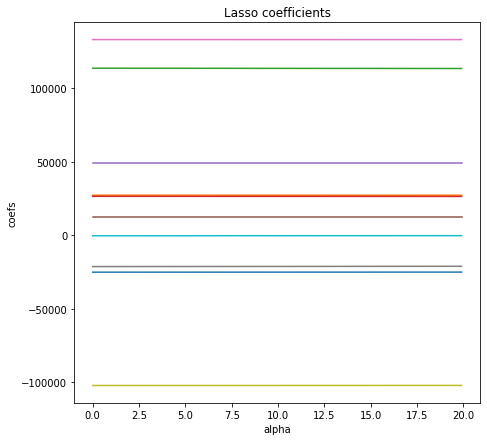

In [ ]:
# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

From the graph above, the model defines the relationships between variables quit efficiently therefore defining which features are important.

# 4.4 Ridge Regression

The following are the steps we will follow to predict our y variable

a) Define the label and attrributes.

b)Standardize the data

c)Buid the model

d) Find the MSE scores

e) Split the dataset into training and test dataset

f)Make your predictions and conclude.

Unlike the other models, Ridge model does not have regulirization.


In [ ]:
#viewing the dataset we are to use for the regression
hassi.head(4)

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,zipcode
0,221900.0,3,1.00,1180,1.0,0,3,7,1180,1955,98178
1,538000.0,3,2.25,2570,2.0,0,3,7,2170,1951,98125
2,180000.0,2,1.00,770,1.0,0,3,6,770,1933,98028
3,604000.0,4,3.00,1960,1.0,0,5,7,1050,1965,98136


In [ ]:
hassi.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode'],
      dtype='object')

In [ ]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
## Creating features and target matrixes
#
X = hassi[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode']]
y = hassi[['price']]
print(X)
print(y)

       bedrooms  bathrooms  sqft_living  ...  sqft_above  yr_built  zipcode
0             3       1.00         1180  ...        1180      1955    98178
1             3       2.25         2570  ...        2170      1951    98125
2             2       1.00          770  ...         770      1933    98028
3             4       3.00         1960  ...        1050      1965    98136
4             3       2.00         1680  ...        1680      1987    98074
...         ...        ...          ...  ...         ...       ...      ...
21608         3       2.50         1530  ...        1530      2009    98103
21609         4       2.50         2310  ...        2310      2014    98146
21610         2       0.75         1020  ...        1020      2009    98144
21611         3       2.50         1600  ...        1600      2004    98027
21612         2       0.75         1020  ...        1020      2008    98144

[18865 rows x 10 columns]
          price
0      221900.0
1      538000.0
2      180000

In [ ]:
# Creating our baseline regression model

# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

32744537816.488808


The value from the baseline regression model will be used to define if Ridge regression is effective in predicting the values of the y variable.

In [ ]:
#We use Grid search to find the hyperparameter of L2 regurization
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

32995634109.09373

The fit function value 32995634109.09373 is the best possible mean sqaured error. It also indicates a slight difference between the baseline and the fit function values

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)
#32756562890.297123 is lower than 32995634109.09373, which is as a result of the previous results not being cross-validated

32756562890.297123


In [ ]:
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,hassi.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'price': array([-2.86950161e+04,  3.49620184e+04,  1.52358956e+02,  4.78674964e+04,
         6.65640510e+04,  2.07462812e+04,  1.29070628e+05, -3.24631490e+01,
        -3.33654855e+03, -8.59528432e-01])}

The values generated are close to each other meaning that penalization didi not have a large effect.

# 4.5 Elastic Net Regression

In [ ]:
#Importing the libraries needed for the  regression model
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Viewing the dataset we would like to run
hassi.head(4)

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,zipcode
0,221900.0,3,1.00,1180,1.0,0,3,7,1180,1955,98178
1,538000.0,3,2.25,2570,2.0,0,3,7,2170,1951,98125
2,180000.0,2,1.00,770,1.0,0,3,6,770,1933,98028
3,604000.0,4,3.00,1960,1.0,0,5,7,1050,1965,98136


In [ ]:
hassi.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode'],
      dtype='object')

In [ ]:
## Creating features and target matrixes
#
X = hassi[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode']]
y = hassi[['price']]
print(X)
print(y)

       bedrooms  bathrooms  sqft_living  ...  sqft_above  yr_built  zipcode
0             3       1.00         1180  ...        1180      1955    98178
1             3       2.25         2570  ...        2170      1951    98125
2             2       1.00          770  ...         770      1933    98028
3             4       3.00         1960  ...        1050      1965    98136
4             3       2.00         1680  ...        1680      1987    98074
...         ...        ...          ...  ...         ...       ...      ...
21608         3       2.50         1530  ...        1530      2009    98103
21609         4       2.50         2310  ...        2310      2014    98146
21610         2       0.75         1020  ...        1020      2009    98144
21611         3       2.50         1600  ...        1600      2004    98027
21612         2       0.75         1020  ...        1020      2008    98144

[18865 rows x 10 columns]
          price
0      221900.0
1      538000.0
2      180000

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

32744537816.488808


The baseline MSE is 32744537816.488808

In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-2.86950161e+04,  3.49620184e+04,  1.52358956e+02,  4.78674964e+04,
         6.65640510e+04,  2.07462812e+04,  1.29070628e+05, -3.24631490e+01,
        -3.33654855e+03, -8.59528432e-01])}

In [ ]:
# Elastic Net Model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)


33083920130.36541

In [ ]:
#finding the alpha and L1 ratio
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
#The best hyper paramateres for the model: apha= 0.0001 and L1 ratio of 0.8
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

36038361273.749146


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 38633.21333900574,
 'bedrooms': -5633.468193528898,
 'condition': 26578.00158560448,
 'floors': 19380.594388859194,
 'grade': 82422.90600672443,
 'sqft_above': 36.8584497028969,
 'sqft_living': 85.81814876438924,
 'view': 68262.89077246534,
 'yr_built': -1830.9124754709253,
 'zipcode': 182.7197241648118}

**Conclusion**

After running our data through five regression models, Lasso Model with an accuracy of 61% came out as the appropriate model to use. 

# 5. **Follow up Questions**

# 5.1 **Did we have the right Data** 

The data collected by Hass Consultancy Limited helped make the recommendations above. 

# 5.2 **Do we need other data to answer our question**


Other variables can be considered in future to make a full analysis on the topic.

# 5.3 **Do we have the right question?**

Yes, we have.